In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

url_password_game = 'https://neal.fun/password-game/' # global
password = '$XXXVpepsimayH' + '1' * 25


driver = webdriver.Chrome()
driver.get(url_password_game)
password_box = driver.find_element(By.CLASS_NAME, 'ProseMirror')
password_box.send_keys(password)

captcha_list = []


refresh_captcha = driver.find_element(By.CLASS_NAME, 'captcha-refresh')

for _ in range(1000):
    captcha_img = driver.find_element(By.CLASS_NAME, 'captcha-img').get_attribute('src')
    captcha_list.append(captcha_img)
    refresh_captcha.click()

driver.quit()

In [3]:
captcha_list # and then I realised that answer is in the name of the file

['https://neal.fun/password-game/captchas/bw6n6.png',
 'https://neal.fun/password-game/captchas/wce5n.png',
 'https://neal.fun/password-game/captchas/d6fcn.png',
 'https://neal.fun/password-game/captchas/ecd4w.png',
 'https://neal.fun/password-game/captchas/cpc8c.png',
 'https://neal.fun/password-game/captchas/6p7gx.png',
 'https://neal.fun/password-game/captchas/y7mnm.png',
 'https://neal.fun/password-game/captchas/573d8.png',
 'https://neal.fun/password-game/captchas/6xxdx.png',
 'https://neal.fun/password-game/captchas/ec6pm.png',
 'https://neal.fun/password-game/captchas/387g2.png',
 'https://neal.fun/password-game/captchas/bnc2f.png',
 'https://neal.fun/password-game/captchas/y7x8p.png',
 'https://neal.fun/password-game/captchas/573d8.png',
 'https://neal.fun/password-game/captchas/cfc56.png',
 'https://neal.fun/password-game/captchas/5ng6e.png',
 'https://neal.fun/password-game/captchas/w8f36.png',
 'https://neal.fun/password-game/captchas/bnc2f.png',
 'https://neal.fun/password-

In [5]:
x = captcha_list[0]

In [9]:
x[40:45]

'bw6n6'

In [10]:
captcha_list_clean = [x[40:45] for x in captcha_list]
print(len(captcha_list_clean), len(set(captcha_list_clean)))

1000 149


In [11]:
all_sum_captcha = [sum(int(c) for c in x if c.isdigit()) for x in set(captcha_list_clean)]

(array([12.,  0.,  3., 13.,  7.,  9.,  5.,  9., 15.,  8.,  9., 11., 10.,
         6.,  1.,  5.,  7.,  5.,  3.,  1.,  4.,  1.,  1.,  2.,  2.]),
 array([ 0.  ,  0.96,  1.92,  2.88,  3.84,  4.8 ,  5.76,  6.72,  7.68,
         8.64,  9.6 , 10.56, 11.52, 12.48, 13.44, 14.4 , 15.36, 16.32,
        17.28, 18.24, 19.2 , 20.16, 21.12, 22.08, 23.04, 24.  ]),
 <BarContainer object of 25 artists>)

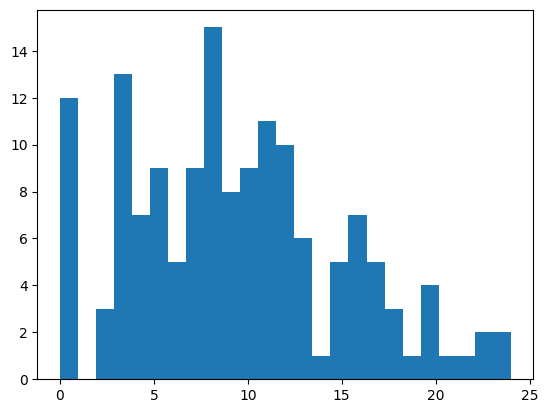

In [16]:
import matplotlib.pyplot as plt
plt.hist(all_sum_captcha, bins=25)